In [ ]:
inputs=[1,2,3]
weights=[0.2,0.8,-0.5]
bias=2

output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+bias
print(output)

2.3


In [ ]:
import numpy as np 

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]
print((weights,biases))

([[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]], [2.0, 3.0, 0.5])


In [ ]:
import numpy as np 

np.random.seed(0)

X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]


class Layer_Dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights=0.10*np.random.randn(n_inputs,n_neurons)
    self.biases=np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output=np.dot(inputs,self.weights)+self.biases

layer1=Layer_Dense(4,5)
layer2=Layer_Dense(5,2)

layer1.forward(X)

layer2.forward(layer1.output)
print(layer2.output)


[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


In [ ]:
!pip install nnfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

X,y = spiral_data(100,3)

class Layer_Dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights=0.10*np.random.randn(n_inputs,n_neurons)
    self.biases=np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output=np.dot(inputs,self.weights)+self.biases


class Activation_ReLU:
  def forward(self,inputs):
    self.output=np.maximum(0,inputs)

class Activation_Softmax:
  def forward(self,inputs):
    exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
    probabilities = exp_values/np.sum(exp_values,axis=1,keepdims=True)
    self.output=probabilities

class Loss:
  def calculate(self,output,y):
    sample_losses=self.forward(output,y)
    data_loss=np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentropy(Loss):
  def forward(self,y_pred,y_true):
    samples=len(y_pred)
    y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)

    if len(y_true.shape)==1:
      correct_confidences=y_pred_clipped[range(samples),y_true]
    elif len(y_true.shape)==2:
      correct_confidences=np.sum(y_pred_clipped*y_true,axis=1)
    negative_log_likelihoods=-np.log(correct_confidences)
    return negative_log_likelihoods


X,y =spiral_data(samples=100,classes=3)

dense1=Layer_Dense(2,3)
activation1=Activation_ReLU()

dense2=Layer_Dense(3,3)
activation2=Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

loss_function=Loss_CategoricalCrossentropy()
loss=loss_function.calculate(activation2.output,y)

print("loss:",loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333376 0.33333224 0.333334  ]
 [0.33334652 0.33330023 0.33335322]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0985749


In [ ]:
import math
softmax_output=[0.7,0.1,0.2]
target_class=0
target_output=[1,0,0]
loss=-(math.log(softmax_output[0])*target_output[0]+
       math.log(softmax_output[1])*target_output[1]+
       math.log(softmax_output[2])*target_output[2])

print(loss)
loss1=-math.log(softmax_output[0])
print(loss1)

0.35667494393873245
0.35667494393873245


In [ ]:
from torchvision.transforms import transforms
import torch
import torchvision
from torchvision import transforms,datasets

train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:

trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset= torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

In [ ]:
x,y=data[0][0],data[1][0]
print(y)

tensor(8)


torch.Size([10, 1, 28, 28])


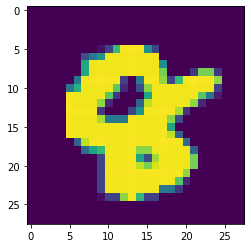

In [ ]:
import matplotlib.pyplot as plt
print(data[0].shape)
plt.imshow(data[0][0].view(28,28))
plt.show()

In [ ]:
total=0
counter_dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
  xs,ys=data
  for y in ys:
    counter_dict[int(y)]+=1
    total+=1

print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
      super().__init__()
      self.fc1=nn.Linear(28*28,64)
      self.fc2=nn.Linear(64,64)
      self.fc3=nn.Linear(64,64)
      self.fc4=nn.Linear(64,10)

    def forward(self,x):
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=F.relu(self.fc2(x))
      x=self.fc4(x)
      return F.log_softmax(x,dim=1)

net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X=torch.rand(28*28)
X=X.view(-1,28*28)
output=net(X)
output

tensor([[-2.3325, -2.3309, -2.3123, -2.3221, -2.1741, -2.3372, -2.1381, -2.3490,
         -2.4091, -2.3530]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(),lr=0.001)
EPOCHS=3

for epoch in range(EPOCHS):
  for data in trainset:
    X,y=data
    net.zero_grad()
    output=net(X.view(-1,28*28))
    loss=F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)
  


tensor(0.1626, grad_fn=<NllLossBackward0>)
tensor(0.1870, grad_fn=<NllLossBackward0>)
tensor(0.2583, grad_fn=<NllLossBackward0>)


In [ ]:
correct =0
total=0

with torch.no_grad():
  for data in trainset:
    X,y = data
    output = net(X.view(-1,784))
    for idx,i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct+=1
      total+=1

print("Accuracy:",round(correct/total,3))


Accuracy: 0.98


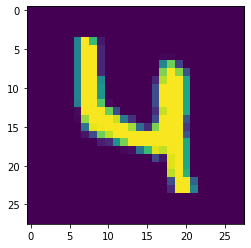

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[7].view(28,28))
plt.show()


In [ ]:
print(torch.argmax(net(X[7].view(-1,784))[0]))

tensor(4)


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUID_DATA =True

class DogsvsCats():
  IMG_SIZE=50
  CATS=""
  DOGS=""
  LABELS={CATS:0,DOGS:1}

  training_data=[]
  catcount=0
  dogcount=0

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
            path=os.path.join(label,f)
            img= cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
            self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

            if label==self.CATS:
              self.catcount+=1
            elif label==self.DOGS:
              self.dogcount+=1
        except:
          pass
      np.random.shuffle(self.training_data)
      np.save("training_data.npy",self.training_data)
      print("Cats:",self.catcount)

if REBUID_DATA:
  dogsvcats = DogsvsCats()
  dogsvcats.make_training_data()
  
